Dataset Overview:-

This dataset contains 10,000 records and 8 columns. Below are the column descriptions:-

Device_ID: Unique identifier for each medical device.

Device_Type: Category of the medical device ('Surgical', 'Therapeutic', 'Monitoring', 'Diagnostic').

Order_Date: Date when the device was ordered, (record captured date)

Monthly_Demand: Estimated number of units required per month.

Lead_Time: Time (in days) taken for delivery after placing an order(Number of days it takes for new stock to arrive)

Stock_Level: Current inventory level of the device.

Supplier_Reliability: A measure (likely between 0 and 1) of how consistently a supplier meets delivery deadlines.

Seasonality_Factor: A coefficient that adjusts demand based on seasonal variations.

In [2]:
# Import Necessary Libraries
import warnings  # To suppress warnings
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import seaborn as sns  # For advanced visualizations
import matplotlib.pyplot as plt  # For plotting basic visualizations
from sklearn.preprocessing import OneHotEncoder, LabelEncoder  # For encoding
import os  # For file handling
import category_encoders as ce
# Suppress warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load the Dataset

df = pd.read_csv("supply_chain_medical_devices_final.csv")

In [4]:
# Initial Data Exploration

print("Dataset Shape:", df.shape)  # Output: (number of rows, number of columns)

# print head
print("\nFirst 5 Rows:")
df.head()

Dataset Shape: (10000, 8)

First 5 Rows:


,Device_ID,Device_Type,Order_Date,Monthly_Demand,Lead_Time,Stock_Level,Supplier_Reliability,Seasonality_Factor
0,DEV_9099,Surgical,2018-01-01,565,18,608,0.81,1.007333
1,DEV_2339,Therapeutic,2018-01-03,480,12,497,0.91,0.975088
2,DEV_159,Surgical,2018-01-05,599,9,646,0.83,1.028933
3,DEV_7489,Monitoring,2018-01-05,478,18,500,0.82,1.044259
4,DEV_6616,Monitoring,2018-01-06,516,12,537,0.72,1.022368


In [5]:
# Check for Datatypes

print("\nColumn Data Types:")
print(df.dtypes)


Column Data Types:
Device_ID                object
Device_Type              object
Order_Date               object
Monthly_Demand            int64
Lead_Time                 int64
Stock_Level               int64
Supplier_Reliability    float64
Seasonality_Factor      float64
dtype: object


In [6]:
# Check for Duplicates and Drop Duplicates.
duplicate_count = df.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicate_count)
if duplicate_count > 0:
    df.drop_duplicates(inplace=True)
    print("Duplicates removed.")
else:
    print("No duplicate rows found.")



Number of Duplicate Rows: 0
No duplicate rows found.


In [7]:
# view statistical measures for numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Demand,10000.0,3000.939600,1454.700275,394.000000,1752.000000,2983.500000,4241.250000,6053.000000
Lead_Time,10000.0,15.965900,7.724656,3.000000,9.000000,16.000000,23.000000,29.000000
Stock_Level,10000.0,3150.683600,1528.304093,408.000000,1835.750000,3130.500000,4448.000000,6472.000000
Supplier_Reliability,10000.0,0.849379,0.086885,0.700000,0.780000,0.850000,0.920000,1.000000
Seasonality_Factor,10000.0,1.000416,0.046137,0.900402,0.966052,0.999986,1.034613,1.099145


In [8]:
# For categorial columns show the number of categories in each one
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} categories")

Device_ID: 10000 categories
Device_Type: 4 categories
Order_Date: 6269 categories


In [9]:
df['Device_Type'].unique()

array(['Surgical', 'Therapeutic', 'Monitoring', 'Diagnostic'],
      dtype=object)

In [10]:
# drop unnecessary columns, Device_ID is a unique identifier 
df.drop(columns=['Device_ID'], inplace=True)

In [11]:
# Converting the column named "Order_Date" to datetime
df["Order_Date"] = pd.to_datetime(df["Order_Date"])

In [12]:
#Check for null values.
null_values = df.isnull().sum()
print(null_values)

Device_Type             0
Order_Date              0
Monthly_Demand          0
Lead_Time               0
Stock_Level             0
Supplier_Reliability    0
Seasonality_Factor      0
dtype: int64


<h1> EDA

<h2> Univariate Analysis:-

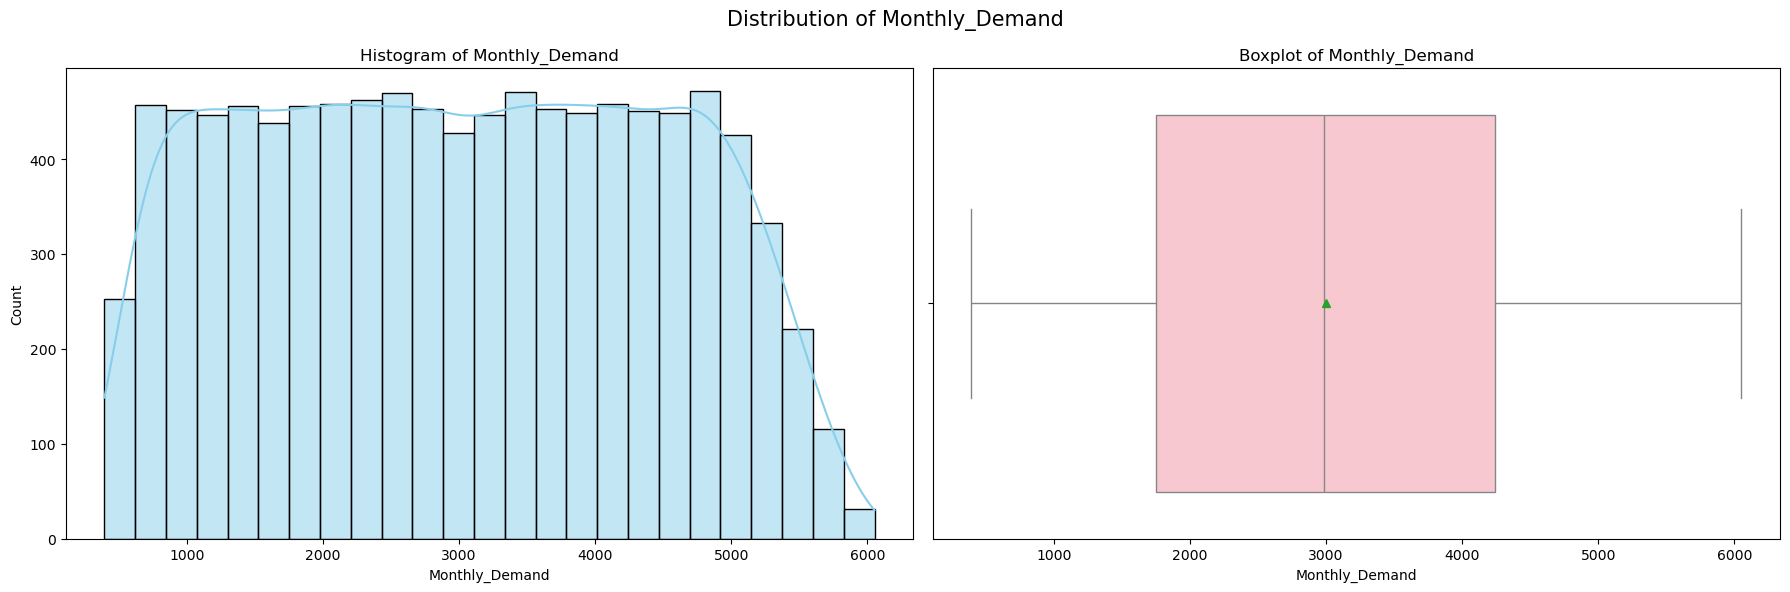

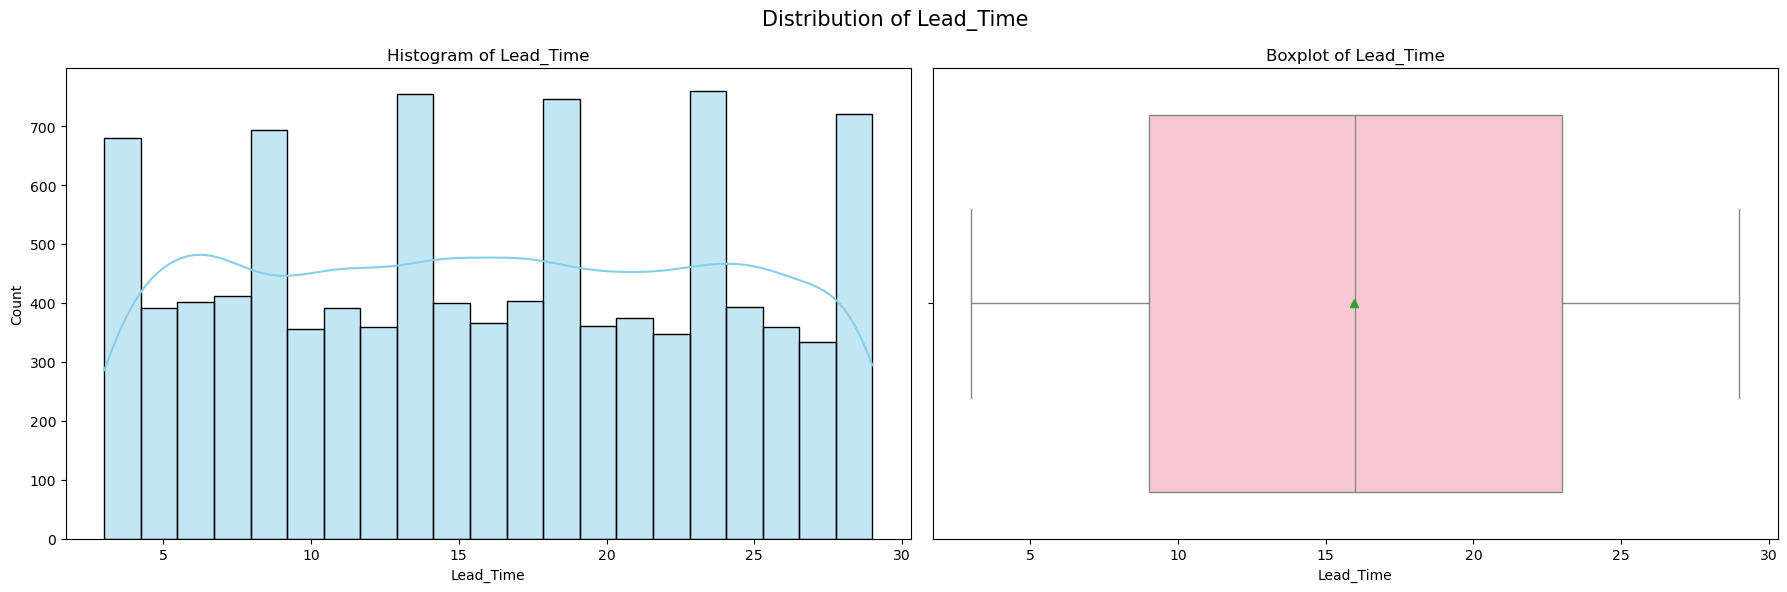

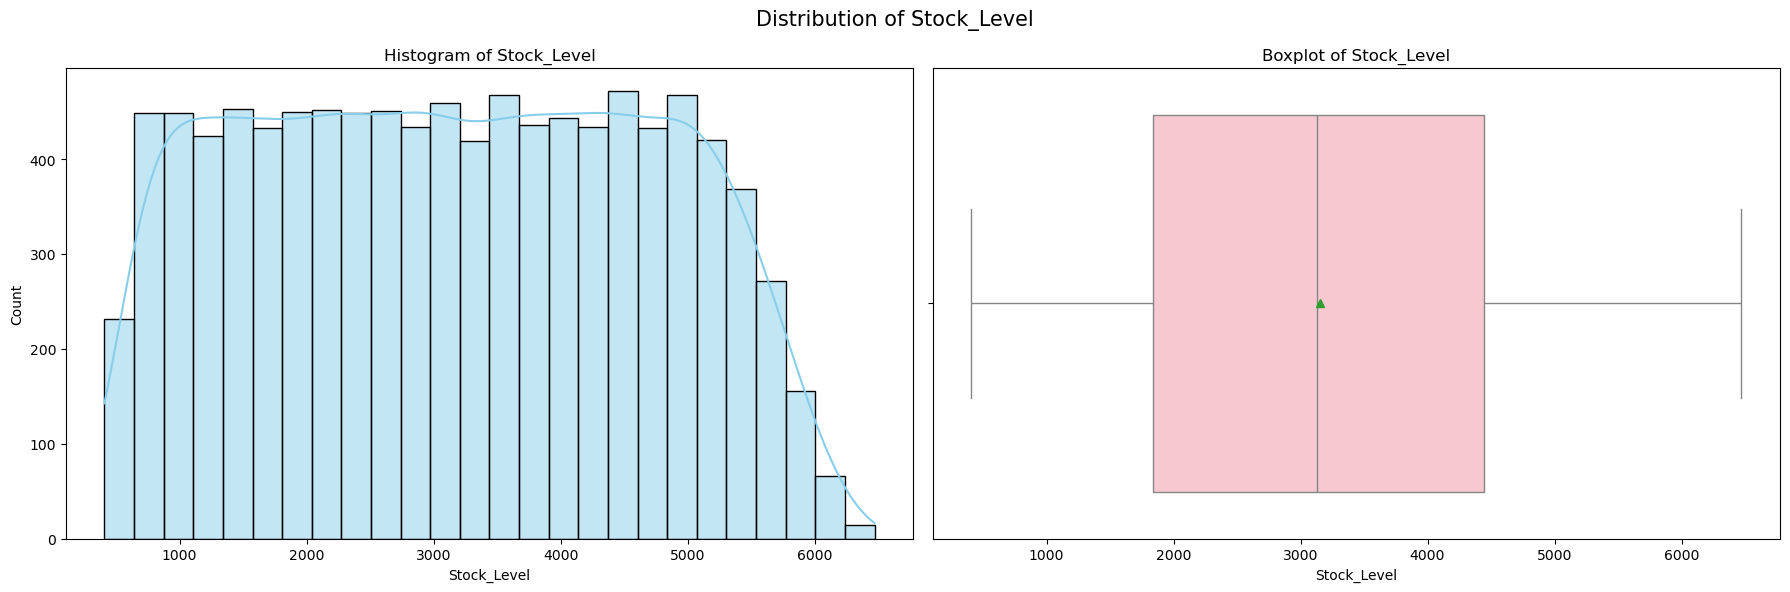

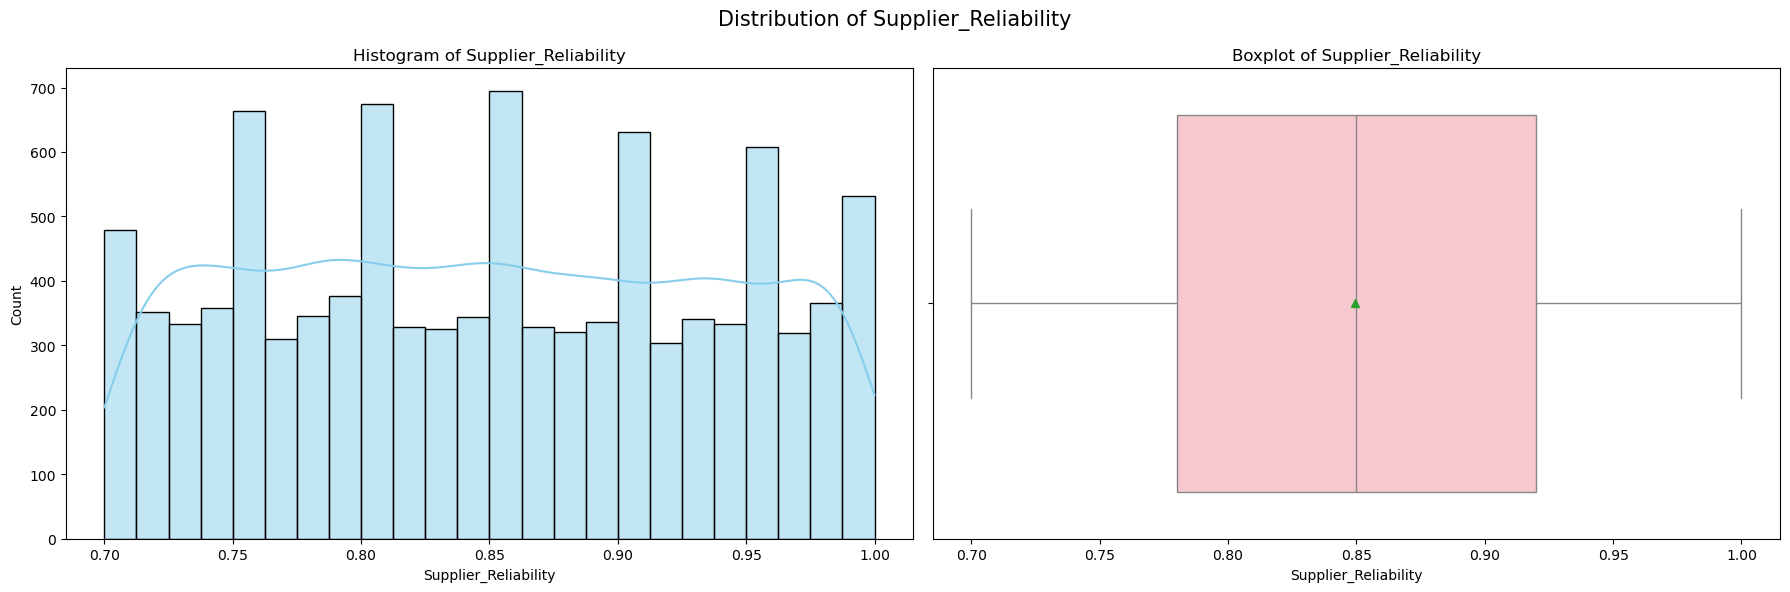

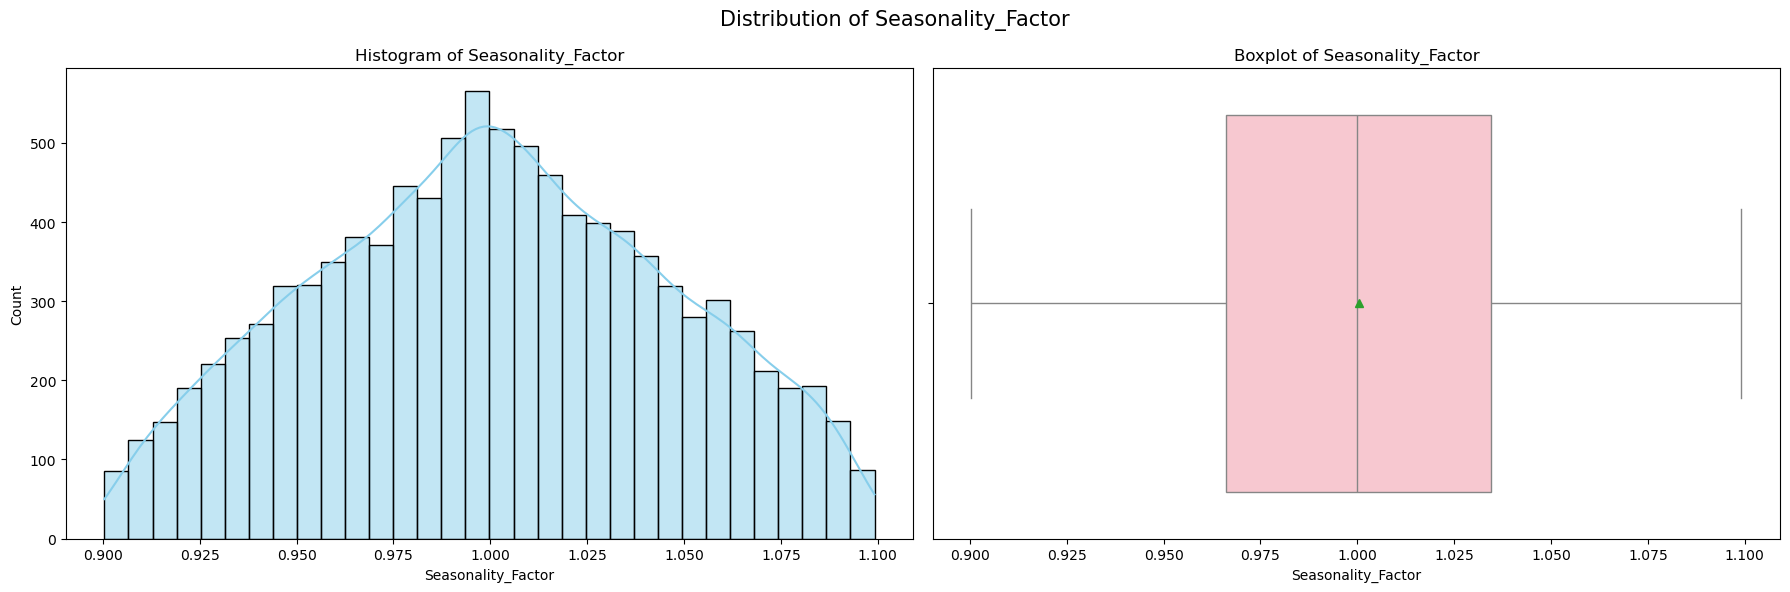

In [13]:
# numerical variables distribution and outliers visualization

# Loop through only numerical columns
numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

for col in numeric_cols:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

    # Histogram with KDE
    sns.histplot(df[col], ax=axes[0], kde=True, color="skyblue")
    axes[0].set_title(f"Histogram of {col}")

    # Boxplot
    sns.boxplot(x=df[col], ax=axes[1], showmeans=True, color="pink")
    axes[1].set_title(f"Boxplot of {col}")

    fig.suptitle(f"Distribution of {col}", fontsize=15)
    plt.tight_layout()
    plt.show()

- demand is widely spread.
The distribution appears fairly uniform with a slight right skew, indicating that a few devices have extremely high demand compared to the majority.
Large IQR means demand varies significantly, possibly due to different device types or seasonal fluctuations.

- lead time, The multi-modal pattern suggests suppliers follow fixed delivery cycles (e.g., weekly or monthly shipments).
but Other values are evenly spread, implying some unpredictability in lead times.
The wide spread of values means that lead times can vary significantly, which could affect supply chain planning.

-  The distribution of stock level is right-skewed, meaning more stock levels are concentrated toward lower values, with a gradual decline towards higher levels.
No extreme outliers, but some stock levels exceed 6,000, indicating possible overstocking in some cases.
High Variability in Stock Levels, Could indicate poor demand forecasting or supply chain inefficiencies.

- Majority of Suppliers Are Reliable (above 0.80), but Some Suppliers May Be Risky (0.70–0.75)
Strategic Supplier Management can be performed (favoring suppliers with reliability scores above 0.85 for critical supplies, For suppliers with lower reliability, negotiate better delivery guarantees or consider alternative sources.)

- there is Minimal Seasonality Effects (most values are between 0.90 and 1.10)
The normal distribution shape indicates consistent demand, making inventory planning and forecasting easier.
The distribution is symmetrical and bell-shaped, resembling a normal distribution

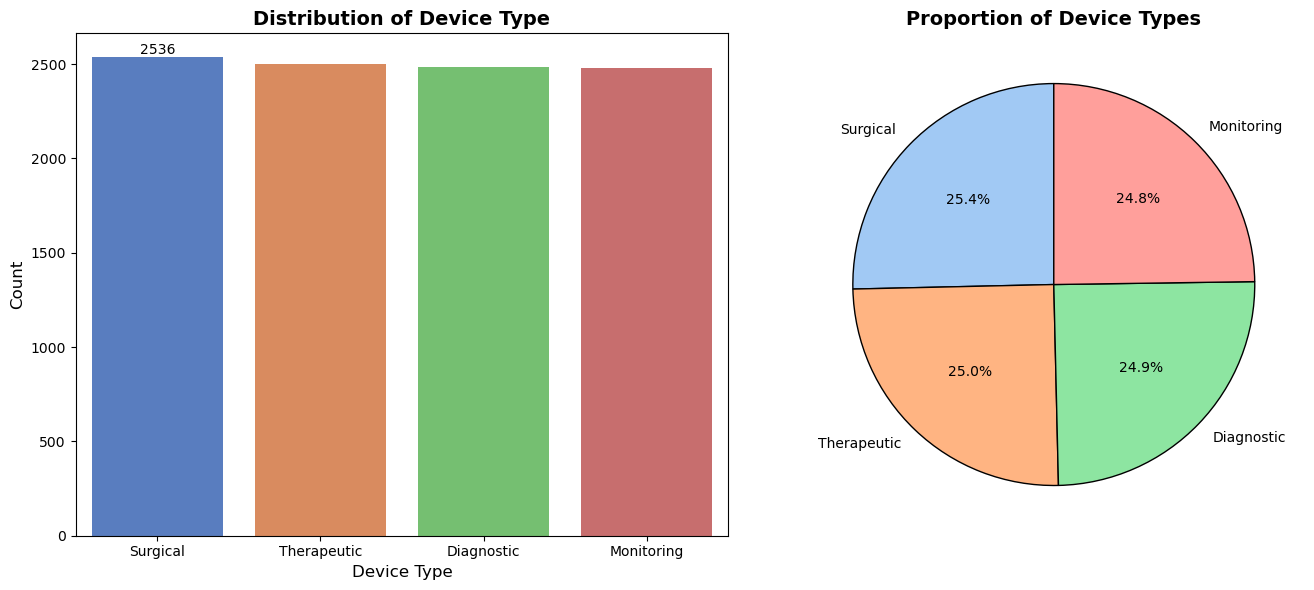

In [14]:
# categorical variable distribution

# Count occurrences of each category
device_counts = df['Device_Type'].value_counts()

# Define a color palette for better visualization
colors = sns.color_palette("pastel")

# Create figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# ---- Bar Plot ----
sns.barplot(x=device_counts.index, y=device_counts.values, palette="muted", ax=axes[0])
axes[0].set_title('Distribution of Device Type', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Device Type', fontsize=12)
axes[0].set_ylabel('Count', fontsize=12)
axes[0].bar_label(axes[0].containers[0], fmt='%d', fontsize=10)  # Show count labels

# ---- Pie Chart ----
axes[1].pie(device_counts, labels=device_counts.index, autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'black'})
axes[1].set_title('Proportion of Device Types', fontsize=14, fontweight='bold')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

- The differences between the device types are relatively small, indicating that they are nearly evenly distributed.
- The almost equal proportions suggest that the dataset is well-balanced in terms of device types.

<h2> Bivariate analysis:-

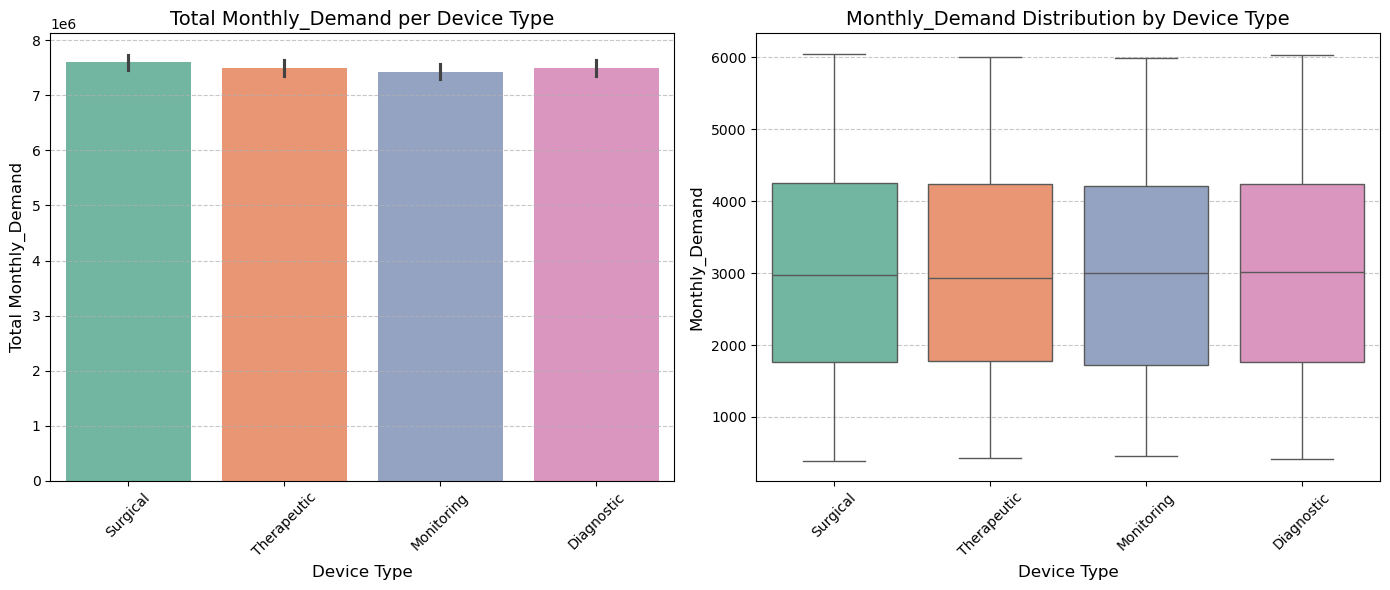

In [15]:
# Device_Type vs. Monthly_Demand
plt.figure(figsize=(14, 6))

# Subplot 1: Bar Chart (Average Monthly_Demand per Device Type)
plt.subplot(1, 2, 1)
sns.barplot(data=df, x='Device_Type', y='Monthly_Demand', estimator=sum, palette='Set2')
plt.title('Total Monthly_Demand per Device Type', fontsize=14)
plt.xlabel('Device Type', fontsize=12)
plt.ylabel('Total Monthly_Demand', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Subplot 2: Boxplot (Monthly_Demand Distribution per Device Type)
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Device_Type', y='Monthly_Demand', palette='Set2')
plt.title('Monthly_Demand Distribution by Device Type', fontsize=14)
plt.xlabel('Device Type', fontsize=12)
plt.ylabel('Monthly_Demand', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()

- Consistent Demand: All device types have nearly the same total monthly demand.
- High Variability: Monthly demand fluctuates widely within each category.
- Stable Market: No major outliers suggest that demand trends are relatively stable over time.

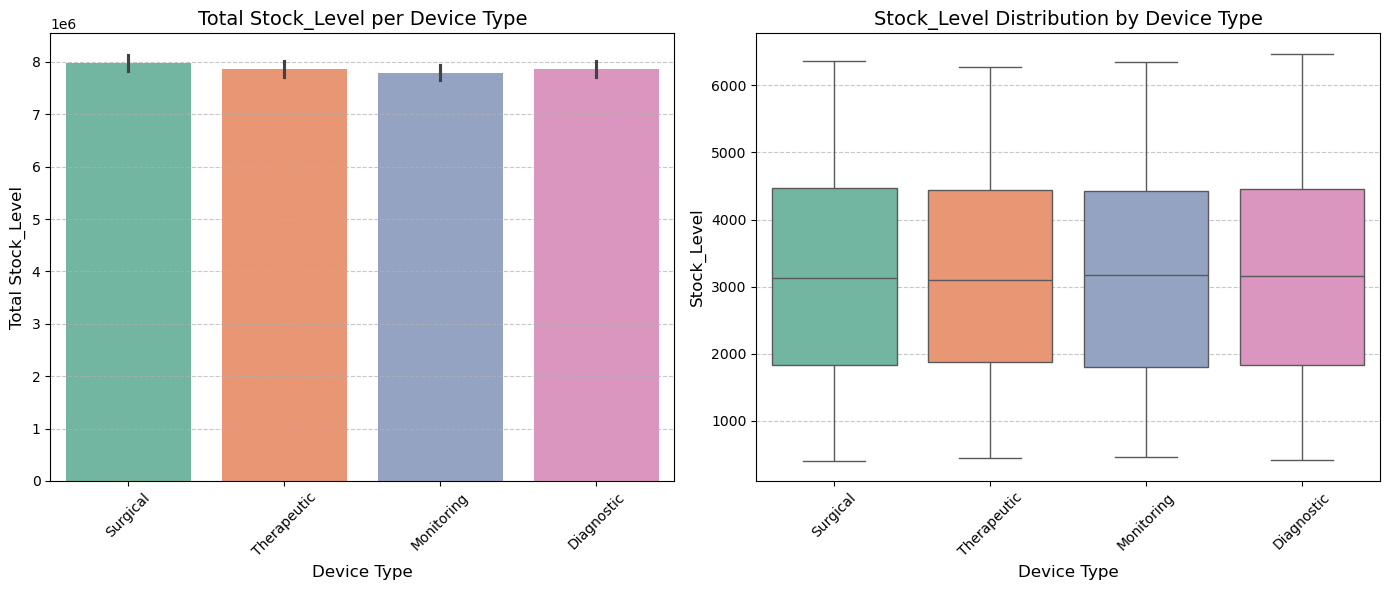

In [16]:
# Device_Type vs. Stock_Level
plt.figure(figsize=(14, 6))

# Subplot 1: Bar Chart (Average Stock_Level per Device Type)
plt.subplot(1, 2, 1)
sns.barplot(data=df, x='Device_Type', y='Stock_Level', estimator=sum, palette='Set2')
plt.title('Total Stock_Level per Device Type', fontsize=14)
plt.xlabel('Device Type', fontsize=12)
plt.ylabel('Total Stock_Level', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Subplot 2: Boxplot (Stock_Level Distribution per Device Type)
plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Device_Type', y='Stock_Level', palette='Set2')
plt.title('Stock_Level Distribution by Device Type', fontsize=14)
plt.xlabel('Device Type', fontsize=12)
plt.ylabel('Stock_Level', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()

- Balanced Inventory: All device types maintain similar total stock levels.
- Stock Variability: Monthly stock levels fluctuate significantly across all device types.
- Stable Supply Chain: No extreme outliers suggest that stock levels are generally well-managed.

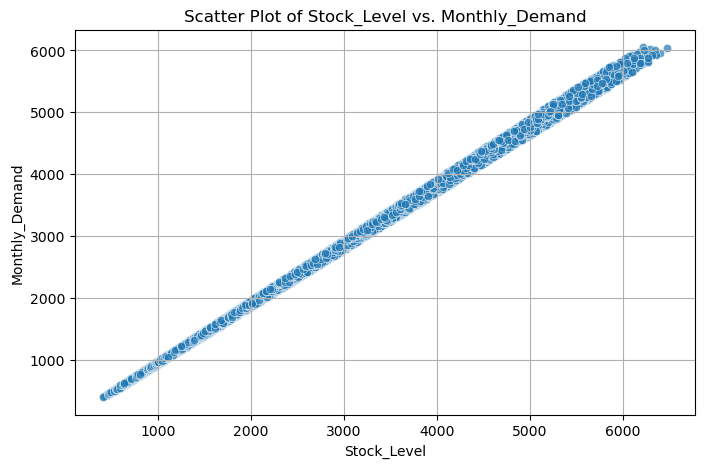

In [17]:
# stock level vs. monthly demand

plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Stock_Level", y="Monthly_Demand", alpha=0.7)
plt.title("Scatter Plot of Stock_Level vs. Monthly_Demand")
plt.xlabel("Stock_Level")
plt.ylabel("Monthly_Demand")
plt.grid(True)
plt.show()

- Direct Proportionality – As Stock_Level increases, Monthly_Demand also increases proportionally.
- Highly Correlated – The data points form a nearly perfect straight line, suggesting a near 1:1 correlation (possibly close to 𝑟 = 1).
- Predictability – This strong relationship indicates that Monthly_Demand can be reliably predicted using Stock_Level (or vice versa).
- No Outliers – There are no significant deviations, meaning the trend is consistent across the dataset.

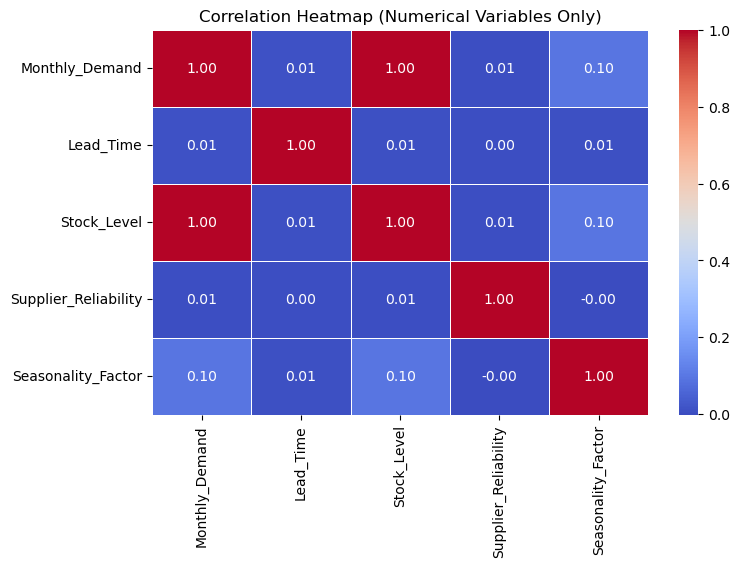

In [18]:
# correlation for all numeric variables
# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Plot correlation heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Numerical Variables Only)")
plt.show()

- Monthly Demand and Stock Level are strongly correlated (~0.99), which makes sense because stock levels are adjusted based on demand.
- Lead Time has a weak correlation with Supplier Reliability, suggesting that reliability doesn’t always guarantee shorter delivery times.
- Seasonality Factor has a minor impact, meaning seasonal variations are relatively small.

In [13]:
df2 = df.copy()

In [20]:
# Data column visualization and correlation, without time series

# To analyze trends, we extract different date components.

df['Year'] = df['Order_Date'].dt.year  # Extracts the year
df['Month'] = df['Order_Date'].dt.month  # Extracts the month (1-12)
df['Day'] = df['Order_Date'].dt.day  # Extracts the day of the month
df['Weekday'] = df['Order_Date'].dt.day_name()  # Extracts the name of the weekday
df["Quarter"] = df["Order_Date"].dt.quarter   # Extracts the quarter

#These new columns will help us understand demand patterns based on years, months, or specific weekdays.

In [21]:
df.tail()

,Device_Type,Order_Date,Monthly_Demand,Lead_Time,Stock_Level,Supplier_Reliability,Seasonality_Factor,Year,Month,Day,Weekday,Quarter
9995,Therapeutic,2045-05-12,5540,8,5818,0.88,0.999453,2045,5,12,Friday,2
9996,Monitoring,2045-05-15,5470,10,5588,0.86,0.996702,2045,5,15,Monday,2
9997,Monitoring,2045-05-15,5422,8,5718,0.77,0.989643,2045,5,15,Monday,2
9998,Surgical,2045-05-17,5473,6,5772,0.78,0.994052,2045,5,17,Wednesday,2
9999,Monitoring,2045-05-17,5586,13,5948,0.83,1.003991,2045,5,17,Wednesday,2


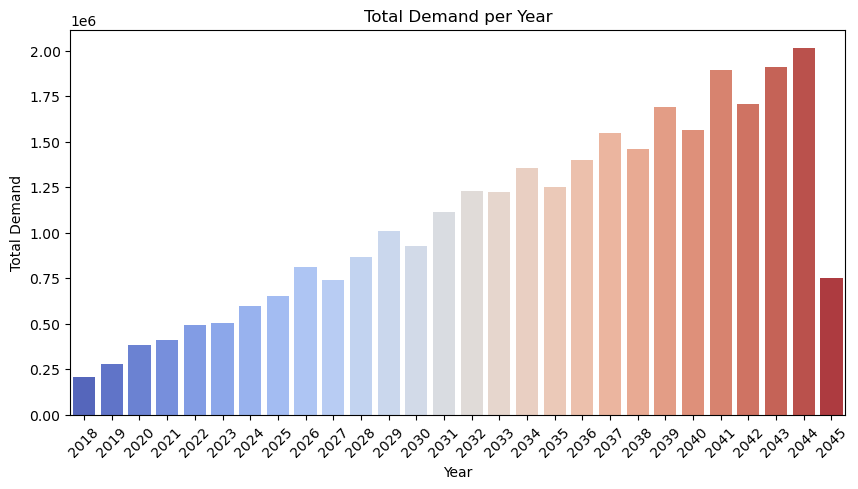

In [37]:
# Plot Demand Over the Years

plt.figure(figsize=(10, 5))
sns.barplot(x=df['Year'], y=df['Monthly_Demand'], estimator=sum, ci=None, palette="coolwarm")
plt.title("Total Demand per Year")
plt.xlabel("Year")
plt.ylabel("Total Demand")
plt.xticks(rotation=45)
plt.show()

# estimator=sum ensures that we sum up the demand for each year.
# ci=None removes confidence intervals for a cleaner plot.

Overall Upward Trend:

The demand has been increasing consistently from 2018 to 2044. This suggests that demand is growing over time.

Accelerated Growth After 2030:

While demand grows steadily in the early years, the rate of increase seems to accelerate after 2030.

Peak Demand Around 2044:

The highest demand is observed in 2044.

Sudden Drop in 2045:

This dataset include records only till may 2045. the year's records are not completed and that may be the reason for this drop. Not a problem.

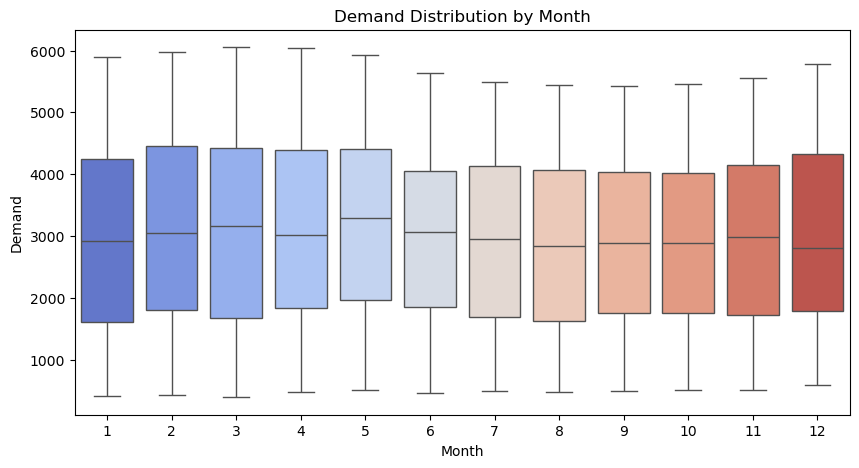

In [39]:
# Monthly Demand Trend (Aggregated by Month)
# The spread of demand per month helps in understanding seasonal patterns.

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Month'], y=df['Monthly_Demand'], palette="coolwarm")
plt.title("Demand Distribution by Month")
plt.xlabel("Month")
plt.ylabel("Demand")
plt.show()

Consistent Demand Across Months:
This suggests that demand does not fluctuate significantly due to seasonal effects, meaning no strong seasonality is observed.

Similar Variability Throughout the Year:
the spread of demand remains consistent, with no particular months showing extreme variations.

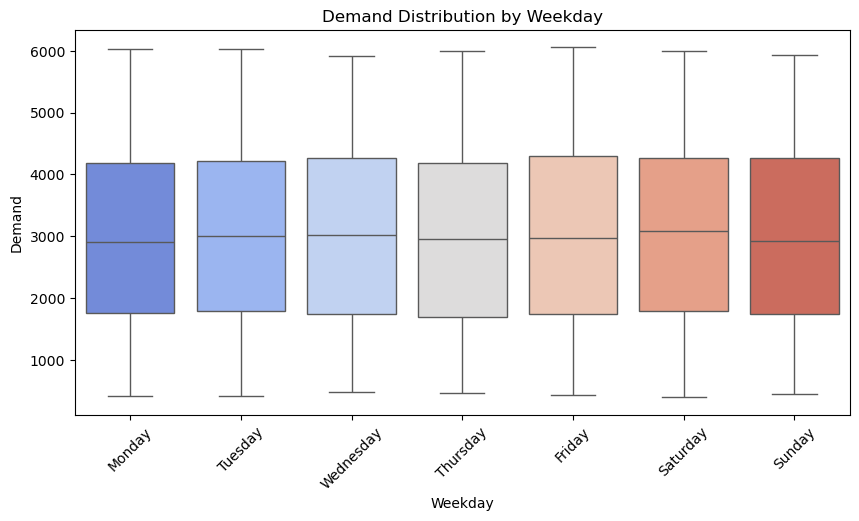

In [40]:
# Weekday Demand Analysis
# The box plot shows how demand fluctuates on different weekdays.

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Weekday'], y=df['Monthly_Demand'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette="coolwarm")
plt.title("Demand Distribution by Weekday")
plt.xlabel("Weekday")
plt.ylabel("Demand")
plt.xticks(rotation=45)
plt.show()

Demand is Fairly Even Across All Days:
This suggests that demand is stable throughout the week, with no significant weekday/weekend effect.

Similar Variability Across Days:
No particular day shows extreme variability compared to others.

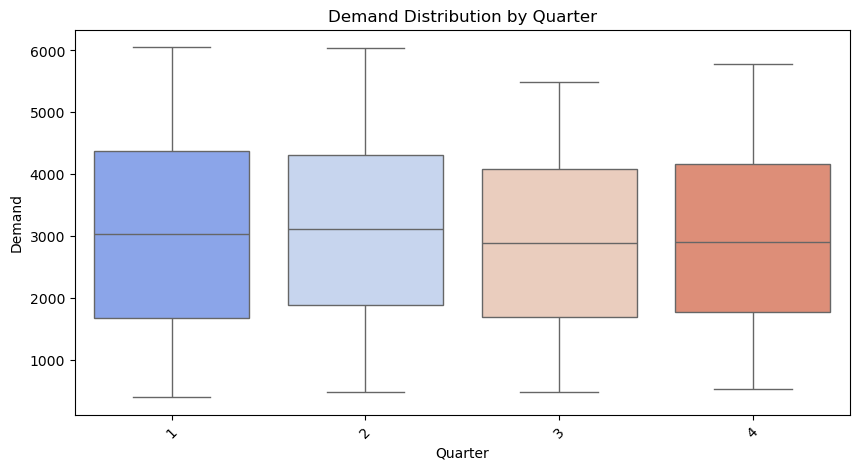

In [23]:
# quarter Demand Analysis
# The box plot shows how demand fluctuates on different quarters.

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['Quarter'], y=df['Monthly_Demand'], palette="coolwarm")
plt.title("Demand Distribution by Quarter")
plt.xlabel("Quarter")
plt.ylabel("Demand")
plt.xticks(rotation=45)
plt.show()

Median Demand is Fairly Consistent Across Quarters:-
This suggests that, on average, demand remains stable throughout the year without extreme shifts in the median value.

Demand Variability is Similar Across Quarters:-
This suggests there is no single quarter with significantly higher or lower demand variability.

Potential Stability in Hospital Procurement & Usage:-
Since no quarter shows extreme variation, this might indicate that hospital procurement processes are structured and follow planned cycles.

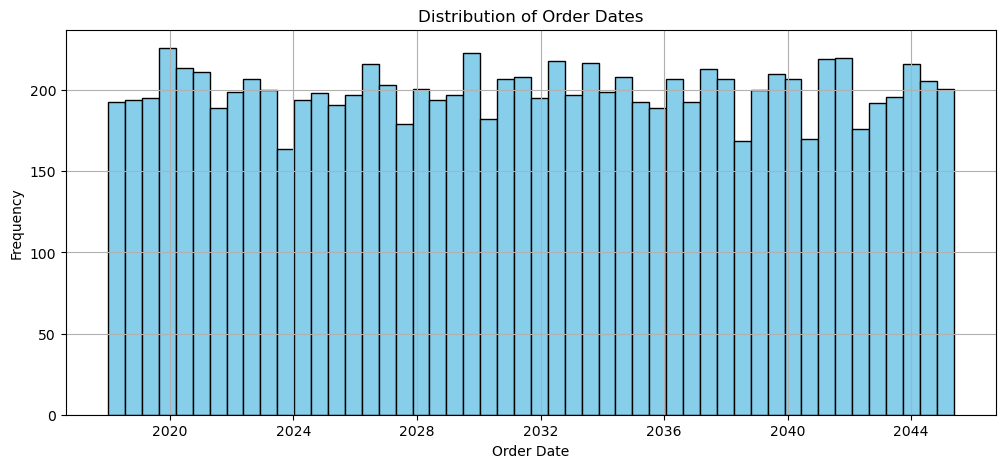

In [41]:
# Distribution of Orders Over Time

plt.figure(figsize=(12, 5))
df['Order_Date'].hist(bins=50, color='skyblue', edgecolor='black')
plt.title("Distribution of Order Dates")
plt.xlabel("Order Date")
plt.ylabel("Frequency")
plt.show()

Orders Are Fairly Evenly Distributed Over Time:
the number of orders remains stable over the years.

Some Periods Have Slightly Higher Order Frequency:
A few spikes indicate periods where order frequency was higher than usual.
This could be due to seasonal demand, or external factors like cold season in winter.

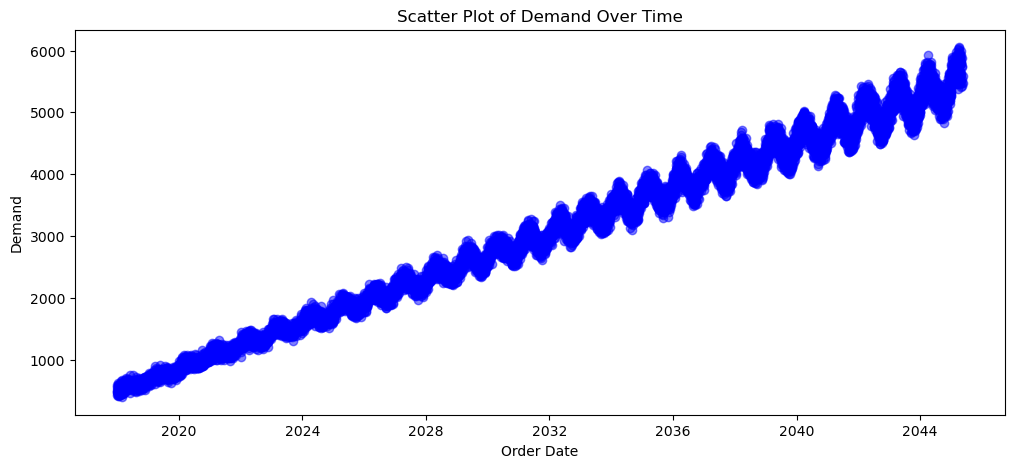

In [42]:
# Demand Over Time (Without Time Series Analysis)

plt.figure(figsize=(12, 5))
plt.scatter(df["Order_Date"], df["Monthly_Demand"], alpha=0.5, color="blue")
plt.title("Scatter Plot of Demand Over Time")
plt.xlabel("Order Date")
plt.ylabel("Demand")
plt.show()

Strong Upward Trend in Demand:

The demand is steadily increasing over time.
The increase appears to be nonlinear, possibly exponential, suggesting accelerating growth.

Seasonal or Cyclical Patterns:

The wave-like oscillations in the scatter plot suggest a seasonal trend in demand.
Demand rises and falls periodically, meaning certain times of the year might have consistently higher or lower demand.

No Sharp Drops or Disruptions:

The trend remains smooth and continuous, implying no sudden disruptions like supply chain failures.

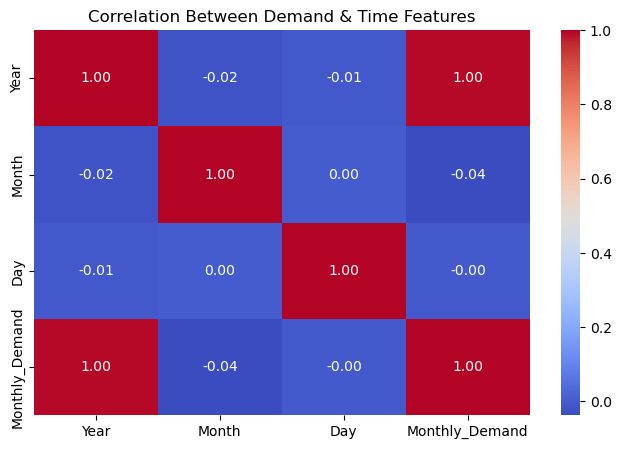

In [43]:
# Correlation Between Demand & Time Features

time_features = ["Year", "Month", "Day"]
plt.figure(figsize=(8, 5))
sns.heatmap(df[time_features + ["Monthly_Demand"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Demand & Time Features")
plt.show()

<h1> Pre-processing:-

As shown, there are no null values or outliers in this dataset. So, I will only deal with encoding object columns (Device_Type (one hot encoding), Weekday(ordinal encoding))
I will also drop the Order_Date columns as I don't need it any more

In [ ]:
# encoding

categorical_columns = [ 'Weekday', 'Device_Type']

for column in categorical_columns:

        # ordinal data encoding
    if  column == 'Weekday': 
        ordinal_mapping = {'Saturday': 1, 'Sunday': 2, 'Monday': 3, 'Tuesday': 4, 'Wednesday': 5, 'Thursday': 6, 'Friday': 7}  
        df[column].replace(ordinal_mapping, inplace=True)

    else:
        # One-Hot Encoding 
        encoder = OneHotEncoder(sparse_output=False, drop='first')
        one_hot_encoded = encoder.fit_transform(df[[column]])
        one_hot_df = pd.DataFrame(one_hot_encoded, 
                                  columns=[f"{column}_{cat}" for cat in encoder.categories_[0][1:]],
                                  index=df.index)
        df = pd.concat([df.drop(columns=[column]), one_hot_df], axis=1)


In [28]:
# Drop Order_Date column

df.drop('Order_Date', axis=1, inplace=True)

In [29]:
df.head()

,Monthly_Demand,Lead_Time,Stock_Level,Supplier_Reliability,Seasonality_Factor,Year,Month,Day,Weekday,Quarter,Device_Type_Monitoring,Device_Type_Surgical,Device_Type_Therapeutic
0,565,18,608,0.81,1.007333,2018,1,1,3,1,0.0,1.0,0.0
1,480,12,497,0.91,0.975088,2018,1,3,5,1,0.0,0.0,1.0
2,599,9,646,0.83,1.028933,2018,1,5,7,1,0.0,1.0,0.0
3,478,18,500,0.82,1.044259,2018,1,5,7,1,1.0,0.0,0.0
4,516,12,537,0.72,1.022368,2018,1,6,1,1,1.0,0.0,0.0


In [30]:
df.to_csv('cleaned_SC_dataset.csv', index=False)

<h2> Time series Analysis:-

In [14]:
df2.head()

,Device_Type,Order_Date,Monthly_Demand,Lead_Time,Stock_Level,Supplier_Reliability,Seasonality_Factor
0,Surgical,2018-01-01,565,18,608,0.81,1.007333
1,Therapeutic,2018-01-03,480,12,497,0.91,0.975088
2,Surgical,2018-01-05,599,9,646,0.83,1.028933
3,Monitoring,2018-01-05,478,18,500,0.82,1.044259
4,Monitoring,2018-01-06,516,12,537,0.72,1.022368


In [15]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [16]:
df2.set_index('Order_Date', inplace=True)  # Set Date as the index
df2 = df2.sort_index()  # Ensure the dataset is sorted by date

In [17]:
# Resample the data monthly to see overall trends
monthly_demand = df2['Monthly_Demand'].resample('M').sum()

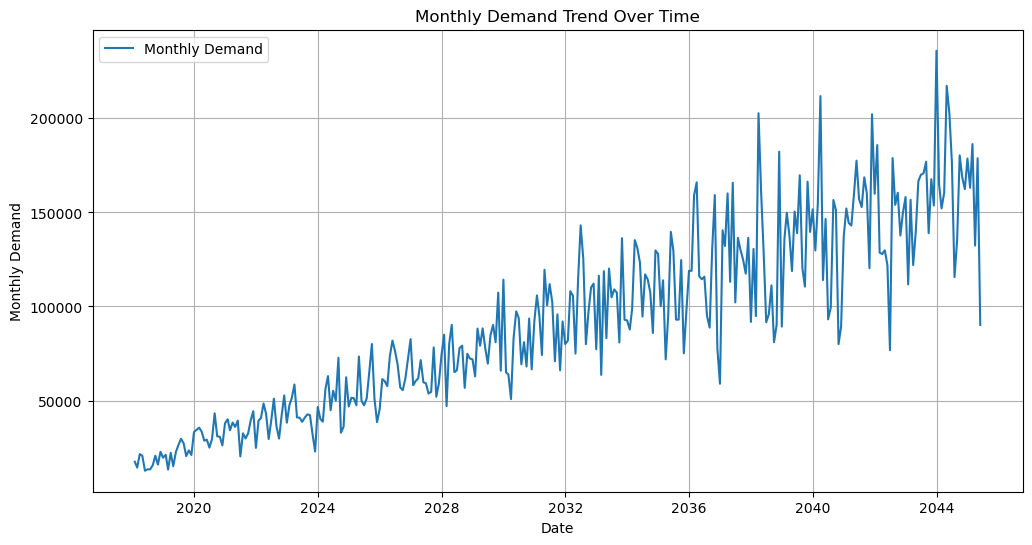

In [18]:
# Plot Monthly Demand Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_demand, label="Monthly Demand")
plt.xlabel("Date")
plt.ylabel("Monthly Demand")
plt.title("Monthly Demand Trend Over Time")
plt.legend()
plt.grid(True)
plt.show()


1. Overall Upward Trend:-
- The demand appears to increase over time, indicating growth.
- This suggests either Increasing Patient Load, Expansion of Hospital Services, or Changes in Disease Patterns.

2. High Volatility and Fluctuations:-
The variations become more erratic over time.
Possible reasons:
- Seasonal demand shifts (e.g., certain months have spikes).
- Supply chain issues causing fluctuations.
- Market disruptions influencing demand.

3. Potential Seasonality:-
There seem to be repeating peaks and dips at regular intervals.
This suggests that demand might follow a seasonal pattern (e.g., higher demand in certain months).

4. Increasing Variance Over Time:-
The fluctuations in demand grow larger in later years.
This might indicate:

- Increased Uncertainty in Patient Demand:-
The hospital may be experiencing unpredictable patient inflow, possibly due to:
Seasonal disease outbreaks (e.g., flu, COVID-19 waves).
Changes in local demographics (e.g., migration, aging population).
External crises (e.g., natural disasters, economic downturns).

- Supply Chain Instability
If the demand for medical supplies fluctuates widely, it might indicate:
Delays in procurement—supplies arriving irregularly, leading to sudden surges in orders.
Budget constraints—ordering in bulk at certain times and then facing shortages.
Global supply chain disruptions (e.g., pandemics, political conflicts).

- Hospital Expansion & Infrastructure Growth
As the hospital expands its services, demand fluctuations may grow because:
New departments open gradually, increasing demand in phases.
Patient admission policies change, causing inconsistent demand.

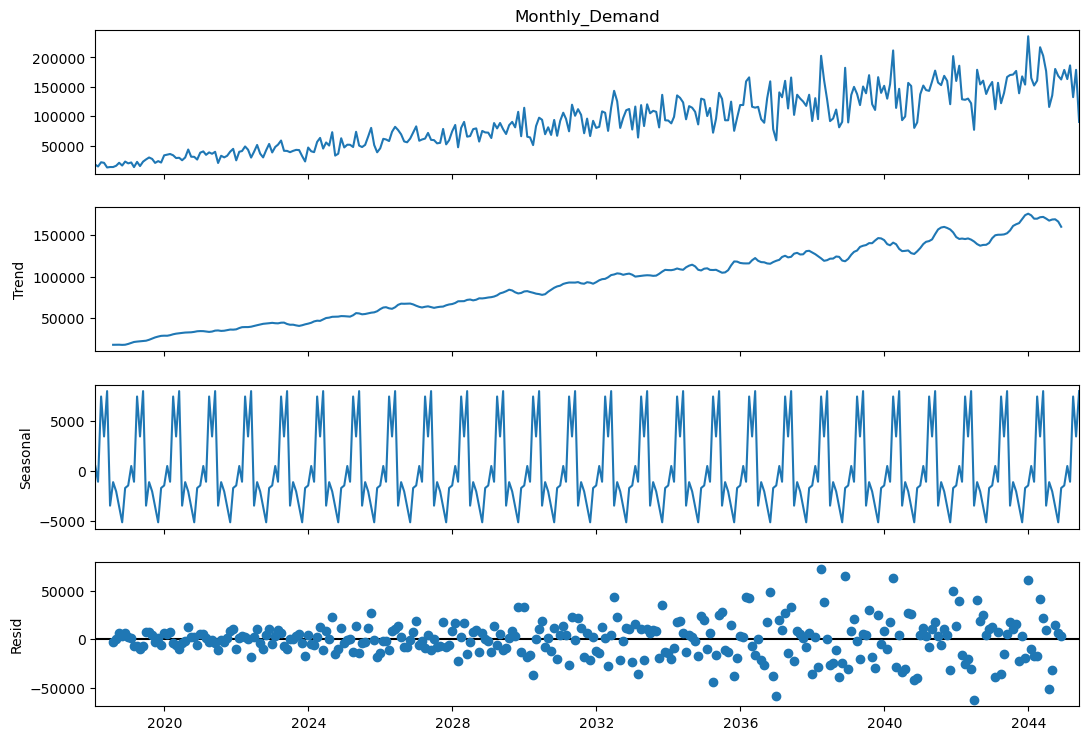

In [19]:
# Time Series Decomposition, Splits the time series into trend, seasonality, and residuals.
decomposition = sm.tsa.seasonal_decompose(monthly_demand, model='additive', period=12)
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()


1. Observed (Top Plot):-
This is the original time series, showing the overall pattern of Monthly Demand.
It confirms the upward trend and periodic fluctuations.

2. Trend:-
A clear increasing trend over time.
This suggests a long-term growth in demand.

3. Seasonality:-
The seasonal pattern is strong and repetitive with clear peaks and dips at regular intervals.
This indicates that demand is heavily influenced by recurring factors that repeat over a fixed period (e.g., daily, weekly, monthly, or yearly).
Possible Explanations: Seasonal Illnesses and Disease Outbreaks, Cyclical Hospital Admissions & Surgeries, Holiday & Vacation Impact on Healthcare Demand 

4. Residual (Noise):-
The residuals show some random fluctuations, but no major anomalies.
Some variance increases in later years, which might indicate external disruptions (e.g.supply chain issues).

Key Takeaways & Next Steps:-
✅ Strong trend + seasonal pattern → Time series models like SARIMA or Prophet would work well.
✅ Plan inventory & operations based on seasonal spikes.
✅ Forecast future demand to optimize business decisions.

In [20]:
# ADF Test for Stationarity, If p-value > 0.05, the series is non-stationary.
adf_test = adfuller(monthly_demand.dropna())  
print("ADF Test Statistic:", adf_test[0])
print("p-value:", adf_test[1])
print("Critical Values:", adf_test[4])

ADF Test Statistic: -0.7730930854656692
p-value: 0.826898297538506
Critical Values: {'1%': -3.451552879535732, '5%': -2.8708786756338407, '10%': -2.571745666091128}


In [21]:
df2.head()

,Device_Type,Monthly_Demand,Lead_Time,Stock_Level,Supplier_Reliability,Seasonality_Factor
Order_Date,,,,,,
2018-01-01,Surgical,565,18,608,0.81,1.007333
2018-01-03,Therapeutic,480,12,497,0.91,0.975088
2018-01-05,Surgical,599,9,646,0.83,1.028933
2018-01-05,Monitoring,478,18,500,0.82,1.044259
2018-01-06,Monitoring,516,12,537,0.72,1.022368


Now, for the next modeling step, I have two options:-

Either working on df with Machine learning or Deep learning models

Or, working on df2 with time series model

As each option will follow different way from now on, I made these two versions of my dataframe.

In [22]:
df2.to_csv('timeseries_version.csv')